In [109]:
import numpy as np
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid

import matplotlib.pyplot as plt
from glob import glob
import os

import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

%matplotlib inline

In [89]:
## Loading all the files from the 25 Mpc box and adding them together

machine='coho'

if machine=='chinook':
    directory='/Users/lokhorst/Desktop/EAGLE/Niagaraoutput/queue'
elif machine=='coho':
    directory='/Users/deblokhorst/Desktop/EAGLE'

global halpha_25mpc
## load the halpha
halpha_25Mpc_fname = directory+'/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
if os.path.isfile(halpha_25Mpc_fname):
    halpha_25mpc = np.load(halpha_25Mpc_fname)['arr_0']
elif machine=='chinook':
    halpha_25mpc_files = glob(directory+'/emission_halpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print halpha_25mpc_files
    halpha_25mpc = np.load(halpha_25mpc_files[0])['arr_0']
    for filename in halpha_25mpc_files[1:]:
        print 'adding: '+filename
        halpha_25mpc = np.log10(10**halpha_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(halpha_25Mpc_fname,halpha_25mpc)
else:
    print halpha_25Mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'

global o3_25mpc
## load the oiii
o3_25mpc_fname = directory+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
if os.path.isfile(o3_25mpc_fname):
    o3_25mpc = np.load(o3_25mpc_fname)['arr_0']
elif machine=='chinook':
    o3_25mpc_files = glob(directory+'/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print o3_25mpc_files
    o3_25mpc = np.load(o3_25mpc_files[0])['arr_0']
    for filename in o3_25mpc_files[1:]:
        print 'adding: '+filename
        o3_25mpc = np.log10(10**o3_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(o3_25mpc_fname,o3_25mpc)
else:
    print o3_25mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'
    
global lyalpha_25mpc
### load the Lyalpha
lyalpha_25mpc_fname = directory+'/emission_lyalpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz'
if os.path.isfile(lyalpha_25mpc_fname):
    lyalpha_25mpc = np.load(lyalpha_25mpc_fname)['arr_0']
elif machine=='chinook':
    lyalpha_25mpc_files = glob(directory+'/emission_lyalpha_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice*noSFR.npz')
    print lyalpha_25mpc_files
    lyalpha_25mpc = np.load(lyalpha_25mpc_files[0])['arr_0']
    for filename in lyalpha_25mpc_files[1:]:
        print 'adding: '+filename
        lyalpha_25mpc = np.log10(10**lyalpha_25mpc + 10**(np.load(filename)['arr_0']))
    np.savez(lyalpha_25mpc_fname,lyalpha_25mpc)
else:
    print lyalpha_25mpc_fname+' does not exist.  Need to copy over/make on chinook where the slices are.'

o3nonper = np.load('/Users/deblokhorst/Desktop/EAGLE/o3_periodic/emission_o3_L0025N0376_28_test2_SmAb_C2Sm_8000pix_1.250000slice_total_noSFR.npz')['arr_0']


In [99]:
def imreduce(img, factor, log=True, method = 'average'):
    """
    img: 2D image array
    factor: factor by which to reduce the number of array elements along each axis
    log: whether or not the array contains log data values
    """
    if log:
        inimg = 10**img
    else:
        inimg = img
    inshape = np.array(img.shape)

    if np.sum(inshape%factor) != 0:
        print('Output grid must have a integer number of cells: cannot reduce image pixels by a factor %i'%factor)
        return None
    inimg = np.array(np.split(inimg,inshape[0]/factor,axis=0))
    inimg = np.array(np.split(inimg,inshape[1]/factor,axis=-1))

    inimg = np.sum(inimg,axis=-1)
    inimg = np.sum(inimg,axis=-1)
    
    if method == 'average':
        inimg = inimg/np.float(factor**2)
        #outimg = np.average(inimg[])
    if log:
        inimg = np.log10(inimg)
    return inimg.T


o3nonper.shape

## reduce the resolution

o3nonper = imreduce(o3nonper,2)
lyalpha_25mpc = imreduce(lyalpha_25mpc,2)
o3_25mpc = imreduce(o3_25mpc,2)
halpha_25mpc= imreduce(halpha_25mpc,2)

In [100]:
halpha_25mpc.shape

(4000, 4000)

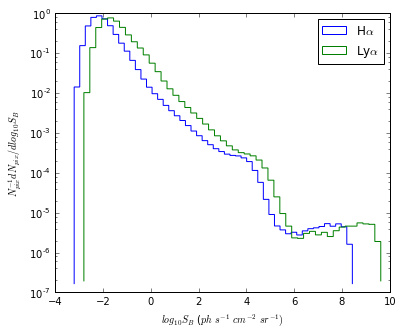

In [11]:
fig = plt.subplots(1,1,figsize=[6,5])
plt.hist(halpha_25mpc.flatten(),bins=50,log='True',normed='True',histtype='step',label=r'H$\alpha$')
plt.hist(lyalpha_25mpc.flatten(),bins=50,log='True',normed='True',histtype='step',label=r'Ly$\alpha$')
#plt.hist(data_27.flatten(),bins=50,log='True',normed='True',histtype='step',label='with SF 27')
#plt.hist(data_28.flatten(),bins=50,log='True',normed='True',histtype='step',label='with SF 28')
plt.ylabel(r'$N^{-1}_{pix}dN_{pix}/dlog_{10}S_{B}$')
plt.xlabel(r'$log_{10}S_{B}$ ($ph$ $s^{-1}$ $cm^{-2}$ $sr^{-1})$')
plt.legend()

#plt.savefig('LyalphaHalphaSBcomparison.png')

In [35]:
pixscale = 25./8000.   ### Mpc/pixel
print pixscale

## at '50Mpc': 
angscale = 0.237/1000.*(1.+0.0115) ### Mpc/arcsec
## at '980Mpc'
angscale = 3.825/1000.*(1.+0.24) ### Mpc/arcsec

pixangscale = pixscale/angscale

print str(pixangscale) + 'arcsec / pixel'

0.003125
0.658865696816arcsec / pixel


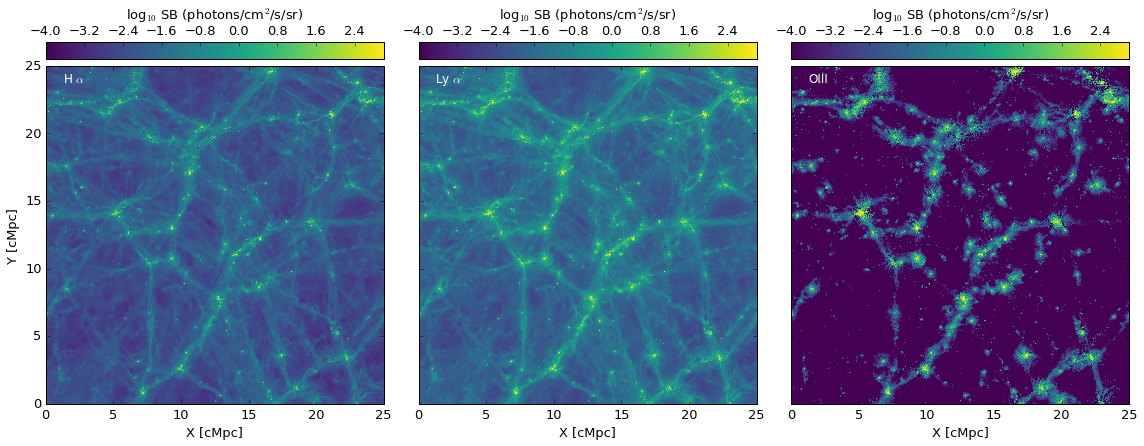

In [12]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)
    clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=3
xystarts = [0,0]
xyextent = [25.,25.]
pltimg(halpha_25mpc,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(lyalpha_25mpc,ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3_25mpc,ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

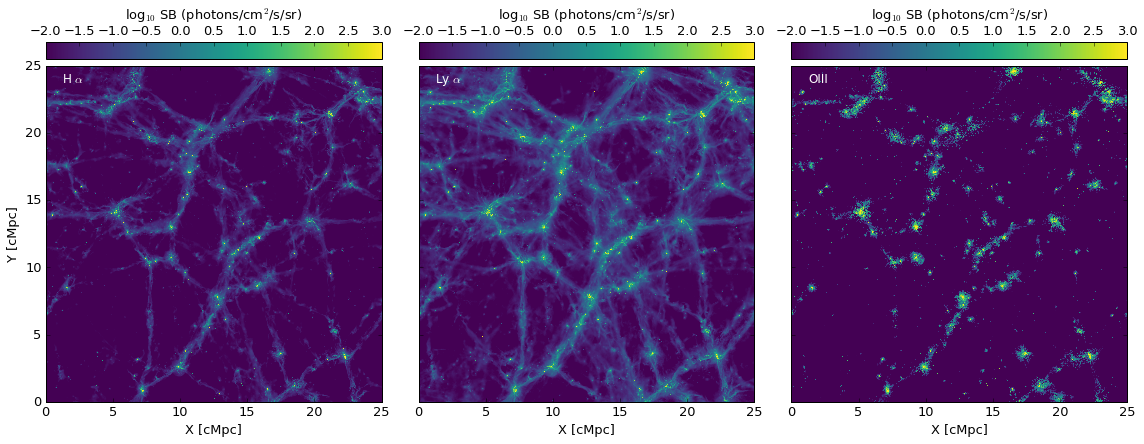

In [13]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-2; Vmax=3
xystarts = [0,0]
xyextent = [25.,25.]
pltimg(halpha_25mpc,ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(lyalpha_25mpc,ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3_25mpc,ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


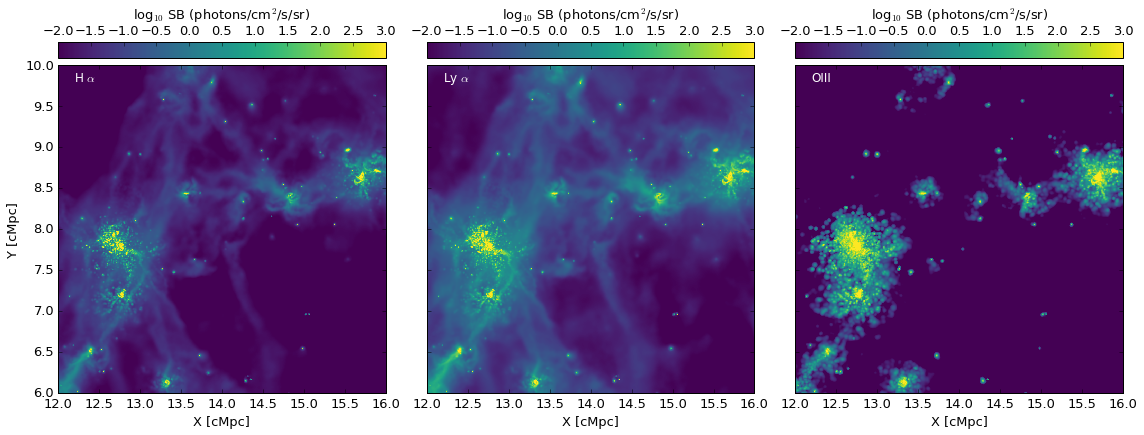

In [17]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)
    clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)'

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=1
Vmin=-6; Vmax=2.5
Vmin=-2; Vmax=3
pixsize = 8000.; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]

pltimg(halpha_25mpc[xystarts[0]/boxsize*pixsize:(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize:(xystarts[1]+xyextent[1])/boxsize*pixsize],\
       ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'H $\alpha$',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(lyalpha_25mpc[xystarts[0]/boxsize*pixsize:(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize:(xystarts[1]+xyextent[1])/boxsize*pixsize],\
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3_25mpc[xystarts[0]/boxsize*pixsize:(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize:(xystarts[1]+xyextent[1])/boxsize*pixsize],\
       ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax)
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

fig.subplots_adjust( wspace=0.)

plt.tight_layout()

#plt.savefig('.png')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:53: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:57: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


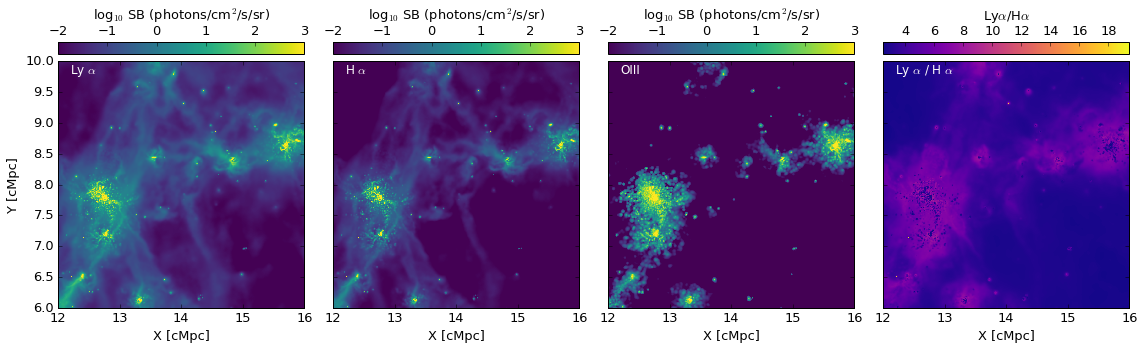

In [42]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None,clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)',cticks=None):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        if cticks is None:
            cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
        else:
            cbar = plt.colorbar(img, cax=cax,orientation='horizontal',ticks=cticks)            
        cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
        cbar.ax.tick_params(labelsize=fontsize)
        cbar.ax.xaxis.set_label_position('top') 
        cbar.ax.xaxis.tick_top()
        #if clabel==r'log$_{10}$ SB (photons/cm$^2$/s/sr)':
       # cax = div.append_axes("right",size="5%",pad=0.1)
       # cbar = plt.colorbar(img, cax=cax,orientation='vertical')        
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)



fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,16))

Vmin=-4; Vmax=3

colmap='viridis'

Vmin=-2; Vmax=3
pixsize = 8000.; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]

subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(halpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'H $\alpha$',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)

pltimg(10**(lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]-halpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]),\
       ax4,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,clabel=r'Ly$\alpha$/H$\alpha$')
plt.text(0.05,0.95,r'Ly $\alpha$ / H $\alpha$',transform=ax4.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)


ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax4.set_yticklabels([])
ax4.set_ylabel('')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticks([12,13,14,15,16])

fig.subplots_adjust( wspace=0.)


plt.tight_layout()

plt.savefig('EAGLE_LyalphaHalphaOIII.png')

## Testing periodicity vs nonperiodicity:  looks like when the periodicity is on, the surface brightness is almost exactly double everywhere 
-- I guess it truly does loop around?

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  del sys.path[0]
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


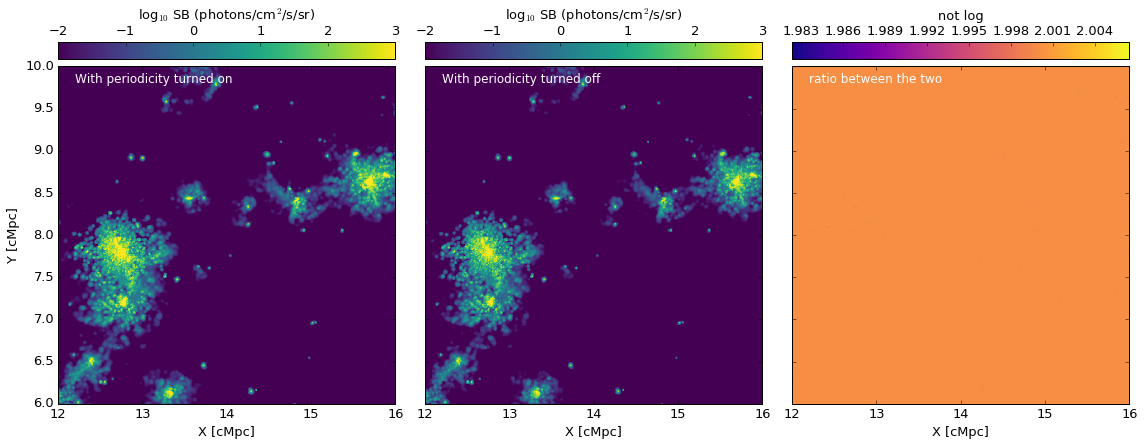

In [97]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,16))

Vmin=-4; Vmax=3

colmap='viridis'

Vmin=-2; Vmax=3
pixsize = 8000.; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]

subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(o3_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'With periodicity turned on',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3nonper[subset[0]:subset[1],subset[2]:subset[3]],\
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'With periodicity turned off',trandsform=ax2.transAxes,horizontalalignment='left',color='white',fontsize=12)

pltimg(10**(o3_25mpc[subset[0]:subset[1],subset[2]:subset[3]]-o3nonper[subset[0]:subset[1],subset[2]:subset[3]]),\
       ax3,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,clabel=r'not log')
plt.text(0.05,0.95,r'ratio between the two',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)


ax2.set_yticklabels([])
ax2.set_ylabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')

for ax in [ax1,ax2,ax3]:
    ax.set_xticks([12,13,14,15,16])

fig.subplots_adjust( wspace=0.)


plt.tight_layout()


/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:60: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:64: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:68: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:74: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:79: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


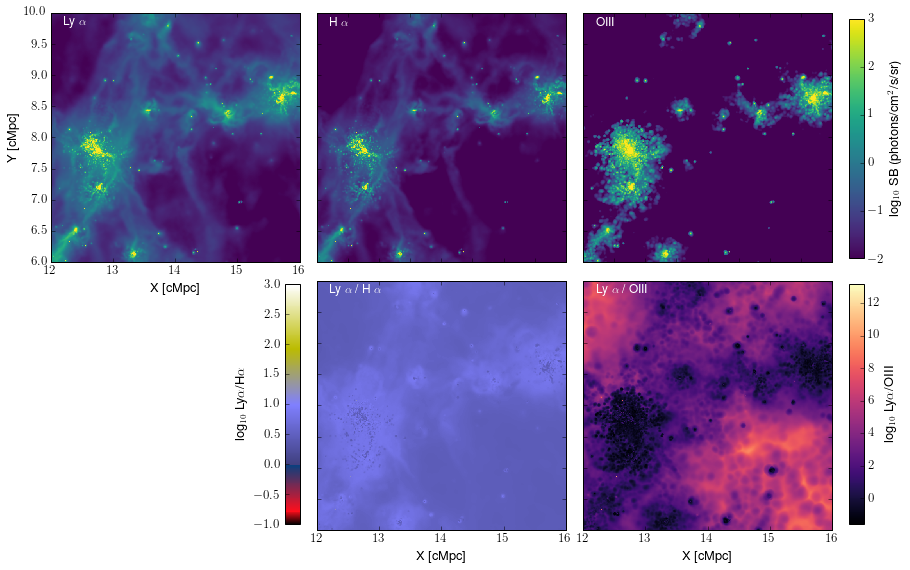

In [120]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,Vmin=None,Vmax=None,clabel = r'log$_{10}$ SB (photons/cm$^2$/s/sr)',cticks=None,orientation='horizontal',cax=None,labelposition='right'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest',vmin=Vmin,vmax=Vmax)

    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
       # ax.xaxis.set_label_position('top') 
       # ax.xaxis.tick_top()
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        if orientation == 'horizontal':
            if cax is None:
                cax = div.append_axes("top",size="5%",pad=0.1)
            if cticks is None:
                cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
            else:
                cbar = plt.colorbar(img, cax=cax,orientation='horizontal',ticks=cticks)            
            cbar.ax.set_xlabel(r'%s' % (clabel), fontsize=fontsize)
            cbar.ax.xaxis.set_label_position('top') 
            cbar.ax.xaxis.tick_top()
        elif orientation == 'vertical':
            if cax is None:
                cax = div.append_axes("right",size="5%",pad=0.1)
            if cticks is None:
                cbar = plt.colorbar(img, cax=cax,orientation='vertical')
            else:
                cbar = plt.colorbar(img, cax=cax,orientation='vertical',ticks=cticks)  
            cbar.ax.set_ylabel(r'%s' % (clabel), fontsize=fontsize)
            cbar.ax.yaxis.set_label_position(labelposition)
            if labelposition=='right':
                cbar.ax.yaxis.tick_right()
            elif labelposition=='left':
                cbar.ax.yaxis.tick_left()
        cbar.ax.tick_params(labelsize=fontsize)
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)


fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(14,9))

Vmin=-4; Vmax=3

colmap='viridis'

Vmin=-2; Vmax=3
pixsize = 4000.; boxsize = 25.
xystarts = [12,6]; xyextent = [4,4]

subset = [xystarts[0]/boxsize*pixsize,(xystarts[0]+xyextent[0])/boxsize*pixsize,xystarts[1]/boxsize*pixsize,(xystarts[1]+xyextent[1])/boxsize*pixsize]

pltimg(halpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax2,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=False,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'H $\alpha$',transform=ax2.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax1,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=False,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3])
plt.text(0.05,0.95,r'Ly $\alpha$ ',transform=ax1.transAxes,\
         horizontalalignment='left',color='white',fontsize=12)

pltimg(o3_25mpc[subset[0]:subset[1],subset[2]:subset[3]],\
       ax3,xystarts,xyextent,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,
       Vmin=Vmin,Vmax=Vmax,cticks=[-2,-1,0,1,2,3],orientation='vertical',cax=plt.axes([0.917, 0.52, 0.015, 0.37]))
plt.text(0.05,0.95,r'OIII',transform=ax3.transAxes,horizontalalignment='left',color='white',fontsize=12)

## Because the ratios are radically different, can't use the same scaling

pltimg((lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]-halpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]),\
       ax5,xystarts,xyextent,label=None,colmap = 'gist_stern',colorbar=True,labelaxes=True,labelposition='left',\
       clabel=r'log$_{10}$ Ly$\alpha$/H$\alpha$',orientation = 'vertical',cax=plt.axes([0.357, 0.11, 0.015, 0.37]),\
       Vmin=-1,Vmax=3)

plt.text(0.05,0.95,r'Ly $\alpha$ / H $\alpha$',transform=ax5.transAxes,horizontalalignment='left',color='white',fontsize=12)
# log( a/b ) = log(a) - log(b)

pltimg((lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]-o3_25mpc[subset[0]:subset[1],subset[2]:subset[3]]),\
       ax6,xystarts,xyextent,label=None,colmap = 'magma',colorbar=True,labelaxes=True,\
       clabel=r'log$_{10}$ Ly$\alpha$/OIII',orientation = 'vertical',cax=plt.axes([0.917, 0.11, 0.015, 0.37]))
plt.text(0.05,0.95,r'Ly $\alpha$ / OIII',transform=ax6.transAxes,horizontalalignment='left',color='white',fontsize=12)

# gist_stern good
#jet and nipy_spectral

#pltimg((lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]-halpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]),\
#       ax5,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,\
#       clabel=r'log$_{10}$ Ly$\alpha$/H$\alpha$',orientation = 'vertical')
#plt.text(0.05,0.95,r'Ly $\alpha$ / H $\alpha$',transform=ax5.transAxes,horizontalalignment='left',color='white',fontsize=12)
## log( a/b ) = log(a) - log(b)
#
#pltimg((lyalpha_25mpc[subset[0]:subset[1],subset[2]:subset[3]]-o3_25mpc[subset[0]:subset[1],subset[2]:subset[3]]),\
#       ax6,xystarts,xyextent,label=None,colmap = 'plasma',colorbar=True,labelaxes=True,\
#       clabel=r'log$_{10}$ Ly$\alpha$/OIII',orientation = 'vertical')
#plt.text(0.05,0.95,r'Ly $\alpha$ / OIII',transform=ax6.transAxes,horizontalalignment='left',color='white',fontsize=12)



ax2.set_yticklabels([])
ax2.set_ylabel('')
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax3.set_yticklabels([])
ax3.set_ylabel('')
ax3.set_xticklabels([])
ax3.set_xlabel('')
ax5.set_yticklabels([])
ax5.set_ylabel('')
ax6.set_yticklabels([])
ax6.set_ylabel('')

for ax in [ax1,ax5,ax6]:
    ax.set_xticks([12,13,14,15,16])

fig.subplots_adjust( wspace=0.07, hspace=0.07, bottom=0.1, right=0.9, top=0.9)

ax4.remove()

#plt.tight_layout()

plt.savefig('EAGLE_LyalphaHalphaOIII_ratios.png')

In [102]:
o3_25mpc.shape

(4000, 4000)